In [1]:
import networkx as nx
import seaborn as sns
from pathlib import Path
import torch
import DQN_agent
from envs.GraphEnv.impnode import ImpnodeEnv
from test_and_compare import test_loop, hda
import matplotlib.pyplot as plt
import  numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
import random

seed = 412
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)


In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

RESULTS_BASEPATH_TEST = 'results/trial_model'
subdir = 'data/30-50'
data_path = Path.cwd()/subdir

NUM_TEST_EPS = 100 # number of test episodes to run

seed = 2
max_removed_nodes = 4

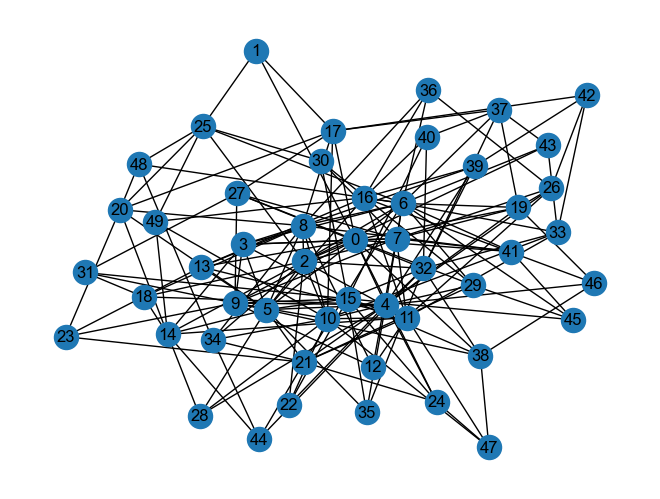

In [36]:
file_name = f"g_{1}.gml"
graph = nx.read_gml(data_path / file_name)
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True)

In [37]:
hda_actions, hda_reward_history, hda_ep_score_history = hda('dw_nd', NUM_TEST_EPS, max_removed_nodes, data_path)

In [38]:

env_test = ImpnodeEnv(anc='dw_nd', ba_nodes=(15, 25), ba_edges=4, max_removed_nodes=max_removed_nodes, seed=seed, render_option=False, data=True, data_path=data_path,train_mode=False)

# create the dqn agent with the stored weights
dqn_agent_test = DQN_agent.DQNAgent(device=device,
                                    state_size=5,  # env_test.observation_space.shape[0],
                                    action_size=env_test.action_space.n,
                                    discount=0.0,
                                    eps_max=0.0,
                                    eps_min=0.0,
                                    eps_step=0.0,
                                    memory_capacity=0,
                                    lr=0,
                                    train_mode=False)
#dqn_agent_test.load_model('{}/dqn_model'.format(RESULTS_BASEPATH_TEST))
dqn_agent_test.load_model('{}/model.pt'.format(RESULTS_BASEPATH_TEST))

In [39]:
# test the agent
actions, reward_history, ep_score_history = test_loop(env=env_test,
                                                        agent=dqn_agent_test,
                                                        NUM_TEST_EPS = NUM_TEST_EPS,
                                                        results_basepath=RESULTS_BASEPATH_TEST)


In [40]:
ep_score = {'HDA_ANC':hda_ep_score_history, 'ImpNode_ANC':ep_score_history}

<Axes: >

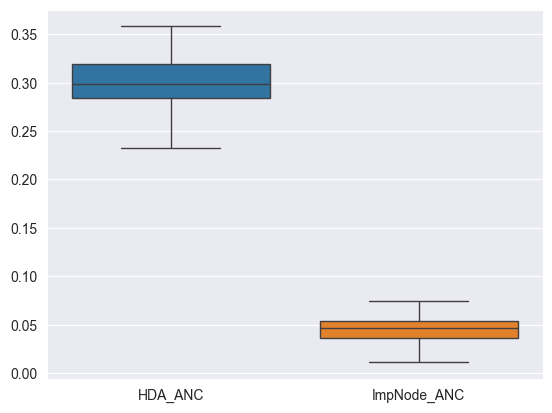

In [41]:
sns.boxplot(ep_score)